In [1]:
import pandas as pd
import numpy as np #For mathematical caculations
import matplotlib.pyplot as plt #For plotting graphs
from datetime import datetime # To access datetime
from pandas import Series # To work on series

In [2]:
%matplotlib inline

In [3]:
import warnings # To ignore the warnings
warnings.filterwarnings("ignore")

In [4]:
train=pd.read_csv("Train_SU63ISt.csv")  #Reading the file 

In [5]:
test=pd.read_csv("Test_0qrQsBZ.csv") #Reading the file

In [6]:
train_original=train.copy()
test_original=test.copy()

In [7]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [8]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [9]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [10]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [11]:
train.shape

(18288, 3)

In [12]:
test.shape

(5112, 2)

In [13]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [14]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


# Feature Extraction

In [15]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [16]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [17]:
train.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [18]:
train['day of week']=train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [19]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [20]:
# 1 if the day of week is a weekend and 0 if the day of week in not a weekend.
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [21]:
temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2

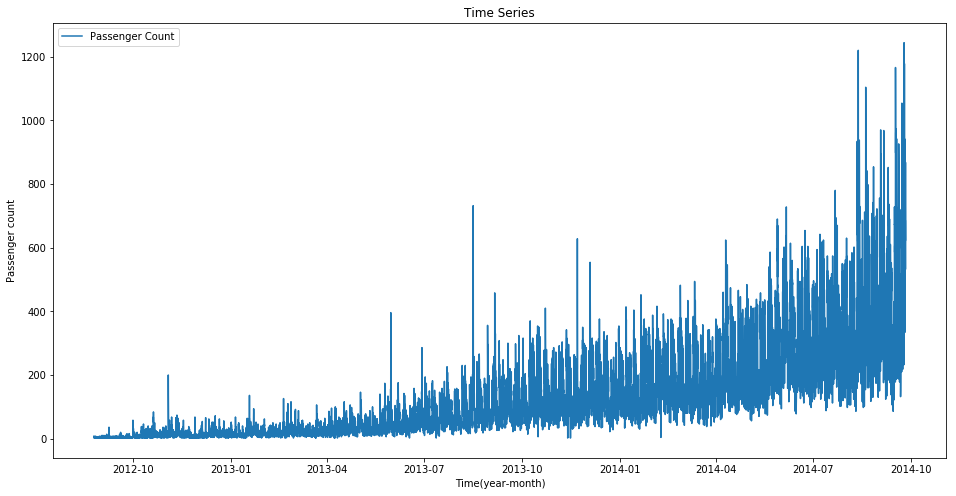

In [22]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis.
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis.
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.


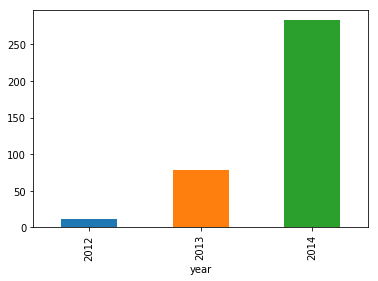

In [23]:
train.groupby('year')['Count'].mean().plot.bar()

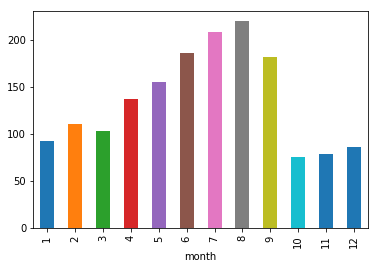

In [24]:
train.groupby('month')['Count'].mean().plot.bar()

In [25]:
train.groupby(['year', 'month'])['Count'].mean()

year  month
2012  8          2.952381
      9          4.444444
      10        10.986559
      11        15.827778
      12        15.680108
2013  1         18.430108
      2         22.190476
      3         23.588710
      4         34.405556
      5         45.612903
      6         57.333333
      7         74.787634
      8        100.137097
      9        120.744444
      10       139.932796
      11       141.000000
      12       157.387097
2014  1        167.204301
      2        200.202381
      3        183.994624
      4        240.955556
      5        264.497312
      6        316.113889
      7        343.354839
      8        389.981183
      9        468.433333
Name: Count, dtype: float64

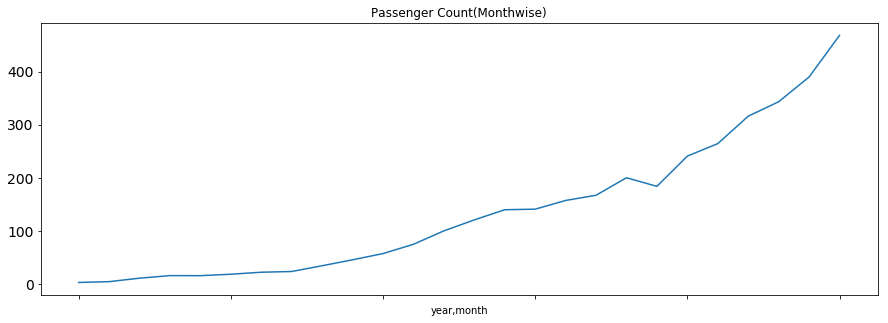

In [26]:
temp=train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

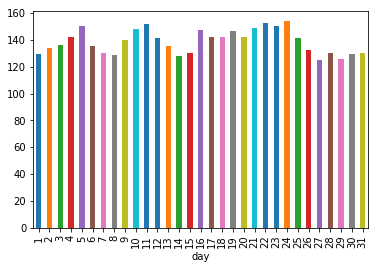

In [27]:
train.groupby('day')['Count'].mean().plot.bar()

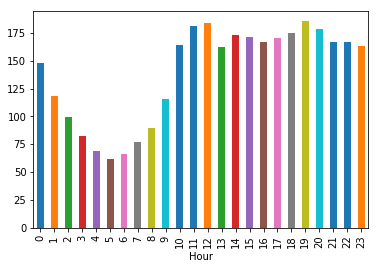

In [28]:
train.groupby('Hour')['Count'].mean().plot.bar()

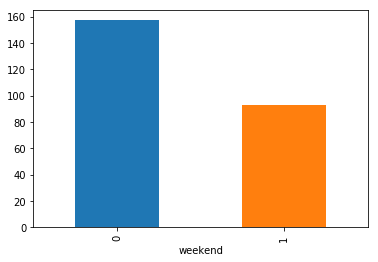

In [29]:
train.groupby('weekend')['Count'].mean().plot.bar()


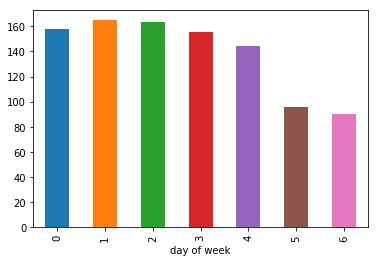

In [30]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [31]:
train=train.drop('ID',1)

In [32]:
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [33]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Hourly time series
hourly = train.resample('H').mean()

# Converting to daily mean
daily = train.resample('D').mean()

# Converting to weekly mean
weekly = train.resample('W').mean()

# Converting to monthly mean
monthly = train.resample('M').mean()

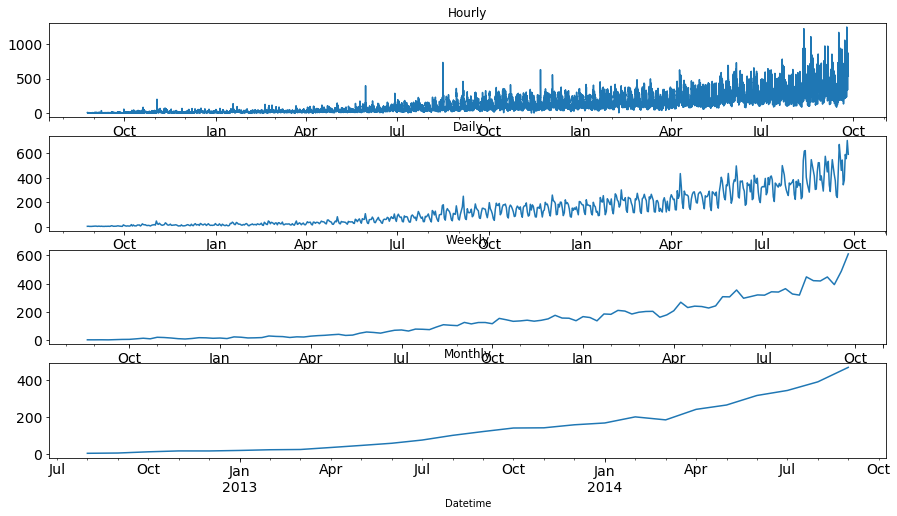

In [34]:
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

In [35]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

In [36]:
train.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [37]:
daily.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [38]:
test.head()

,ID,year,month,day,Hour
Datetime,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5
2014-09-27,18323.5,2014.0,9.0,27.0,11.5
2014-09-28,18347.5,2014.0,9.0,28.0,11.5
2014-09-29,18371.5,2014.0,9.0,29.0,11.5
2014-09-30,18395.5,2014.0,9.0,30.0,11.5


# Splitting the data into training and Validation part

In [39]:
Train=train.ix['2012-08-25':'2014-06-24']
valid=train.ix['2014-06-25':'2014-09-25']

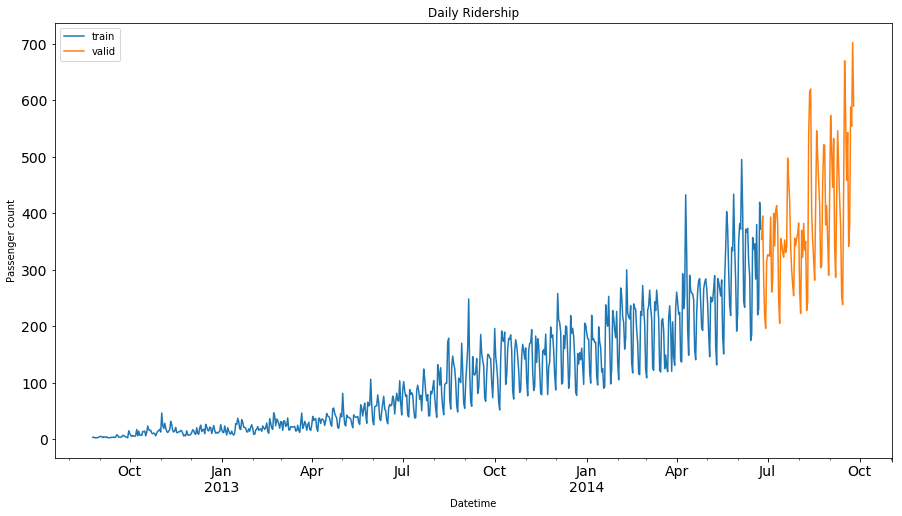

In [40]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

# Modelling Techniques

## Navie Approach

In [41]:
vals = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = vals[len(vals)-1]

In [42]:
y_hat.naive.head()

Datetime
2014-06-25    372.166667
2014-06-26    372.166667
2014-06-27    372.166667
2014-06-28    372.166667
2014-06-29    372.166667
Freq: D, Name: naive, dtype: float64

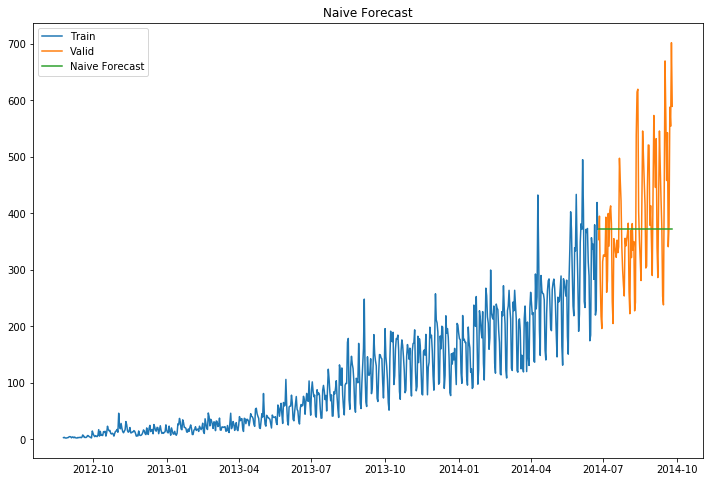

In [43]:
dd= np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index,valid['Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


## Moving Average

## avg of last 10 observations

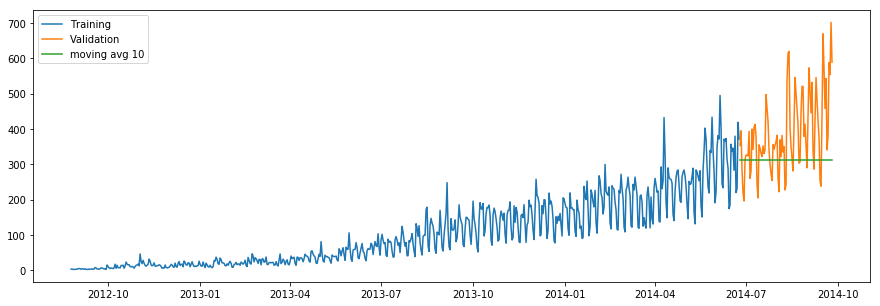

In [45]:
y_hat_avg_10 = valid.copy()
y_hat_avg_10['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15, 5))
plt.plot(Train['Count'], label='Training')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_avg_10['moving_avg_forecast'], label='moving avg 10')
plt.legend(loc='best')
plt.show()

## avg of last 20 observations

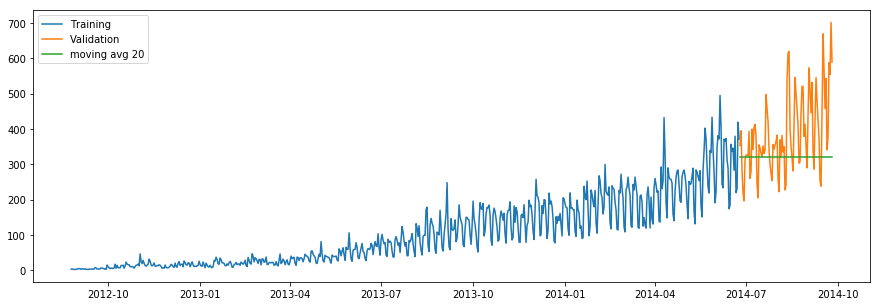

In [46]:
y_hat_avg_20 = valid.copy()
y_hat_avg_20['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations.
plt.figure(figsize=(15, 5))
plt.plot(Train['Count'], label='Training')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_avg_20['moving_avg_forecast'], label='moving avg 20')
plt.legend(loc='best')
plt.show()

## avg of last 50 observations

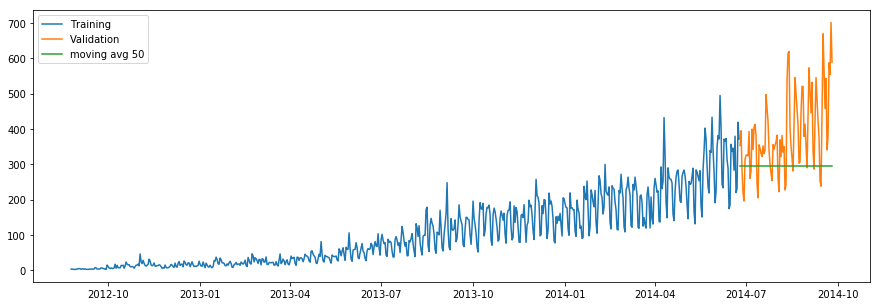

In [47]:
y_hat_avg_50 = valid.copy()
y_hat_avg_50['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(15, 5))
plt.plot(Train['Count'], label='Training')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_avg_50['moving_avg_forecast'], label='moving avg 50')
plt.legend(loc='best')
plt.show()

In [48]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg_50.moving_avg_forecast))
print(rms)

144.19175679986802


In [49]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg_10.moving_avg_forecast))
print(rms)

134.23733308950264


## Simple Exponential Smoothing

In [50]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

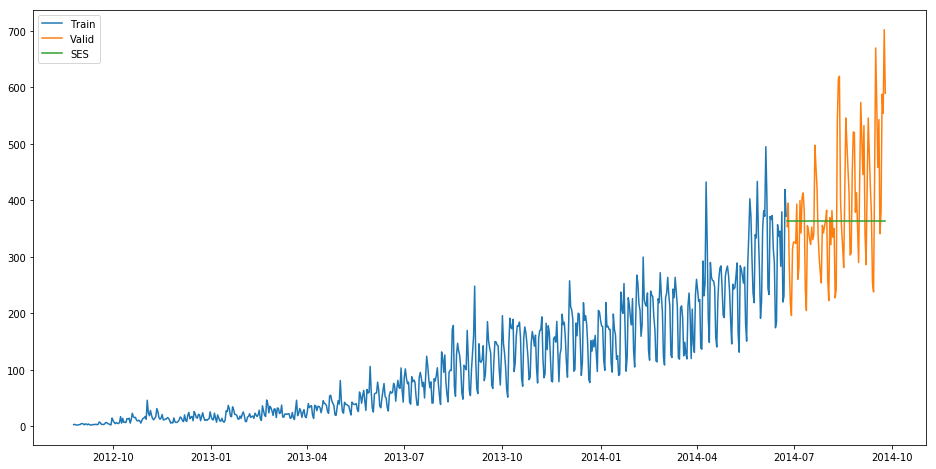

In [51]:
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

## Holt’s Linear Trend Model

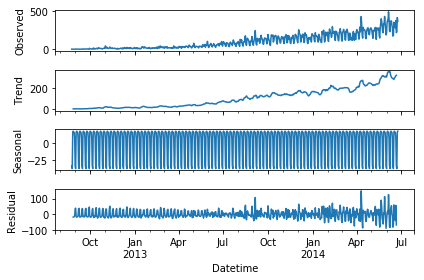

In [52]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

In [53]:
result

(2.9863509590138615,
 1.0,
 20,
 741,
 {'1%': -3.4392057325732104,
  '5%': -2.8654483492874236,
  '10%': -2.5688512291811225},
 7212.068059584323)

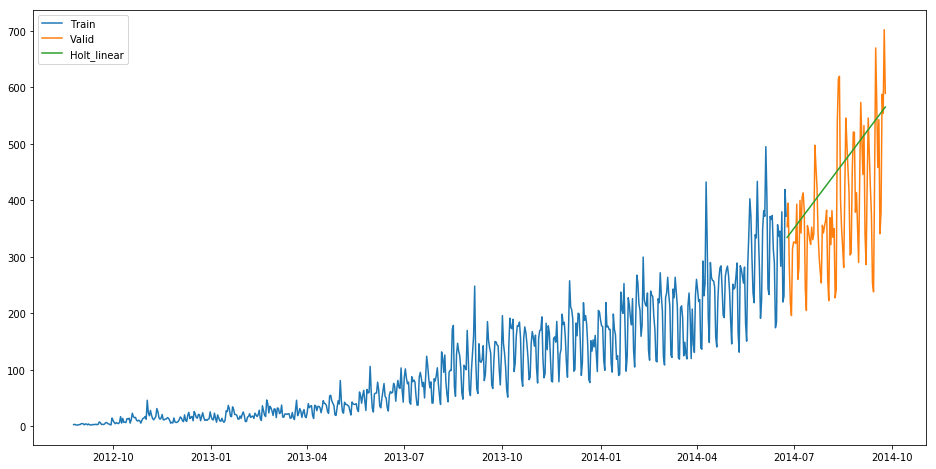

In [54]:
y_hat_avg = valid.copy()

fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [55]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

112.94278345314041


# holt winter model

In [56]:
y_hat_avg_winter = valid.copy()
fit3 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods=7, trend='add', seasonal='add').fit()

In [57]:
fit3

In [58]:
y_hat_avg_winter['Holt_winter'] = fit3.forecast(len(valid))
print(y_hat_avg_winter['Holt_winter'].tolist())

[387.3589065802492, 369.1348330958256, 355.56238897345406, 247.08738898326533, 246.1909847522383, 385.8775616639434, 376.7999114582112, 390.85239020022, 372.62831671579636, 359.05587259342485, 250.58087260323612, 249.6844683722091, 389.37104528391416, 380.293395078182, 394.3458738201908, 376.12180033576715, 362.5493562133956, 254.0743562232069, 253.17795199217989, 392.86452890388495, 383.78687869815275, 397.83935744016156, 379.61528395573794, 366.0428398333664, 257.56783984317764, 256.6714356121507, 396.35801252385573, 387.28036231812354, 401.3328410601323, 383.1087675757087, 369.53632345333716, 261.0613234631484, 260.1649192321214, 399.8514961438265, 390.7738459380943, 404.8263246801031, 386.6022511956795, 373.02980707330795, 264.5548070831192, 263.6584028520922, 403.3449797637973, 394.2673295580651, 408.3198083000739, 390.09573481565025, 376.52329069327874, 268.04829070309, 267.151886472063, 406.83846338376804, 397.7608131780359, 411.81329192004466, 393.58921843562104, 380.0167743132

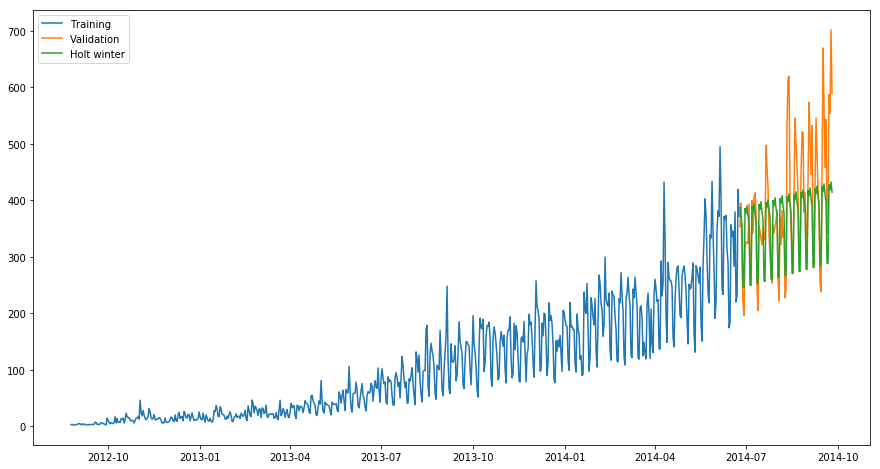

In [59]:
plt.figure(figsize=(15, 8))
plt.plot(Train['Count'], label='Training')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_avg_winter['Holt_winter'], label='Holt winter')
plt.legend(loc='best')
plt.show()

In [60]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg_winter.Holt_winter))
print(rms)

82.37839061457973


In [61]:
predict=fit1.forecast(len(test))

In [62]:
print(predict)

[334.65076685 337.15901127 339.66725568 342.1755001  344.68374451
 347.19198892 349.70023334 352.20847775 354.71672217 357.22496658
 359.73321099 362.24145541 364.74969982 367.25794424 369.76618865
 372.27443307 374.78267748 377.29092189 379.79916631 382.30741072
 384.81565514 387.32389955 389.83214396 392.34038838 394.84863279
 397.35687721 399.86512162 402.37336604 404.88161045 407.38985486
 409.89809928 412.40634369 414.91458811 417.42283252 419.93107694
 422.43932135 424.94756576 427.45581018 429.96405459 432.47229901
 434.98054342 437.48878783 439.99703225 442.50527666 445.01352108
 447.52176549 450.03000991 452.53825432 455.04649873 457.55474315
 460.06298756 462.57123198 465.07947639 467.58772081 470.09596522
 472.60420963 475.11245405 477.62069846 480.12894288 482.63718729
 485.1454317  487.65367612 490.16192053 492.67016495 495.17840936
 497.68665378 500.19489819 502.7031426  505.21138702 507.71963143
 510.22787585 512.73612026 515.24436468 517.75260909 520.2608535
 522.769097

In [63]:
test['prediction']=predict

# ARIMA